## Definición formal de una neurona artificial

En contexto de una clasificación binaria. Podemos definir una función de decisión, $\sigma(z)$ que toma una combinación linear de ciertos valores de entrada, $x$, y el correspondiente vector de pesos, $w$, donde $z$ es la llamada entrada neta $z = w_1x_1 + w_2x_2 + \cdots + w_mx_m$, con:

$$
w = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_m \end{bmatrix} \quad \text{y} \quad x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{bmatrix}
$$

Ahora, si la entrada neta de una observación en particular, $x^{(i)}$, es mayor a un límite $\theta$, predecimos clase 1 y clase 0 de otra forma. Esto es, la función de decisión es la siguiente:

$$
\sigma(z) = \begin{cases} 1 & \text{ si } z \geq \theta \\ 0 & \text{ si } z < \theta \end{cases}
$$

Para facilitar la implementación en código hacemos algunas modificaciones:

$$
z \geq \theta \\
z - \theta \geq 0
$$

Luego definimos una unidad de **sesgo** como $b = -\theta$ y la hacemos parte de la entrada neta:

$$
z = w_1x_1 + w_2x_2 + \cdots + w_mx_m + b = w^Tx + b
$$

Y por último definimos la función de decisión así:

$$
\sigma(z) = \begin{cases} 1 & \text{ si } z \geq 0 \\ 0 & \text{ si } z < 0 \end{cases}
$$

## La regla de aprendizaje del perceptrón

Se puede resumir en estos pasos:

1. Inicializar los pesos y el sesgo a 0 o pequeños números aleatorios.
2. Para cada observación de entrenamiento $x^{(i)}$:
    1.  Computa el valor de salida, $\hat{y}^{(i)}$
    2.  Actualizar los pesos y el sesgo.

El valor de la salida en este caso es la clase predicha por la función de decisión, la actualización de los pesos y el sesgo se puede describir así:

$$
w_j := w_j + \Delta w_j \\
\text{y} \quad b := b + \Delta b
$$

Los deltas se computan así:

$$
\Delta w_j =  \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)} \\
\text{y} \quad \Delta b =  \eta(y^{(i)} - \hat{y}^{(i)})
$$

Cada peso corresponde a una característica. $\eta$ es la tasa de aprendizaje (un valor entre 0 y 1). $y^{(i)}$ es la clase verdadera de la observación $x^{(i)}$ y $\hat{y}^{(i)}$ es la clase predicha por la función de decisión.

La convergencia del perceptrón se garantiza solo si las dos clases son **linealmente separables**.

Si las clases no son linearmente separables, podemos establecer un **máximo de épocas (epochs)** y un límite para la tolerancia de mal clasificados.
 

## Implementación del perceptrón en Python

In [4]:
import numpy as np

class Perceptron:
    """ Clasificador Perceptron
    
    Parámetros:
    -----------
    eta: float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter: int
        Número de pasadas sobre el conjunto de entrenamiento.
    random_state: int
        Semilla para generar los pesos aleatorios.
    
    Atributos:
    ----------
    W_: arreglo 1d
        Pesos después del ajuste.
    b_: escalar
        Sesgo después del ajuste.
    
    errors_: lista
        Número de mal clasificados (actualizaciones) en cada época.
        
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Ajustar los datos de entrenamiento.
        
        Parámetros:
        -----------
        X: {arreglo}, forma = [n_observaciones, n_características]
            Vectores de entrenamiento, donde n_observaciones es el numero de observaciones
            y n_características es el número de características.
        y: {arreglo}, forma = [n_observaciones]
            valores target.
        
        Devuelve:
        ---------
        self: objeto
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                              size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                actualiza = self.eta * (target - self.predict(xi))
                self.w_ += actualiza * xi
                self.b_ += actualiza
                errors += int(actualiza != 0.0)
            self.errors_.append(errors)
        return self
    
    def entrada_neta(self, X):
        """ Calcular la entrada neta """
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """ Devuelve la clase predicha """
        return np.where(self.entrada_neta(X) >= 0.0, 1, 0)

## Entrenamiento del perceptrón con los datos IRIS

In [6]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'
print('De URL:', s)
df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.tail()

De URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


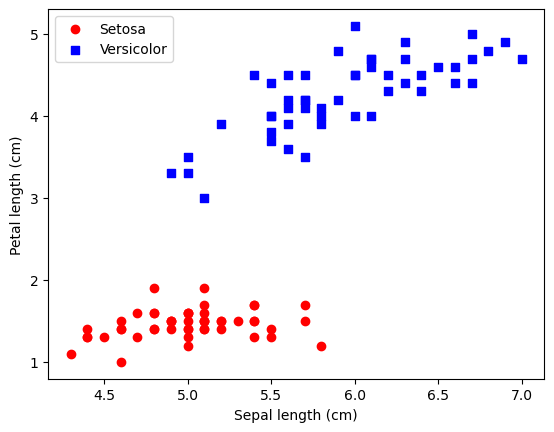

In [7]:
# extraemos las primeras 100 observaciones que corresponden 50 SETOSA y 50 VERSICOLOR
# convertimos 1 versicolor y 0 setosa
# extraemos la primera columna (sepal length) y la tercera columna (petal length)

import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0, 2]].values

# graficamos los datos

plt.scatter(X[:50, 0], X[:50, 1],
            color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color = 'blue', marker = 's', label = 'Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc = 'best')
plt.show()

Vemos que una linea recta podría separar las dos clases. Ahora entrenamos el perceptrón.

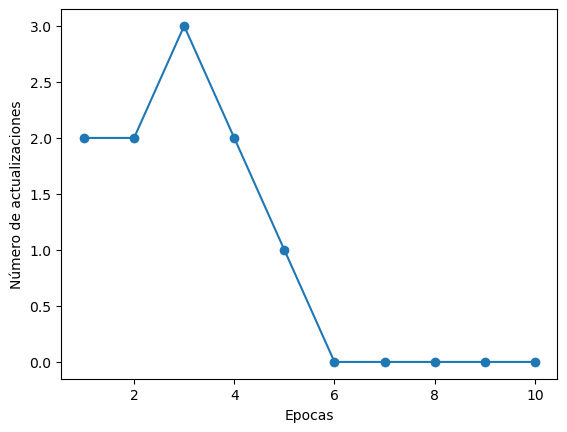

In [8]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker = 'o')
plt.xlabel('Epocas')
plt.ylabel('Número de actualizaciones')
plt.show()

El número de actualizaciones y errores de clasificación son iguales, ya que los pesos y el sesgo se actualizan cada vez que clasifica mal una observación. Vemos que el perceptrón convergió luego de la sexta época y debería clasificar los datos de entrenamiento perfectamente. Ahora graficamos la región de decisión.

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # establecer marcas y mapeo de colores
    marcas = ('o', 's', '^', 'v', '<')
    colores = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colores[:len(np.unique(y))])
    
    # graficar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # graficar las muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c = colores[idx],
                    marker = marcas[idx],
                    label = f'Clase {cl}',
                    edgecolor = 'black')

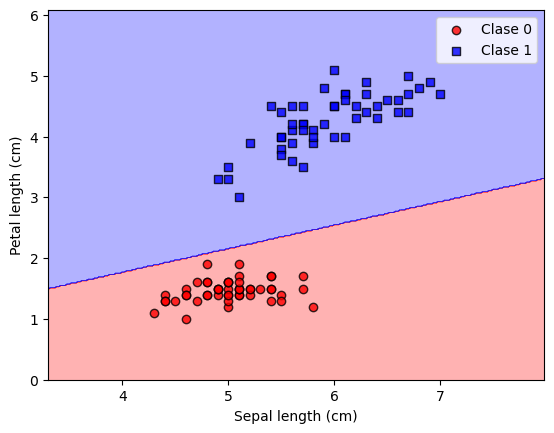

In [10]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc = 'best')
plt.show()

## Adaptive linear neurons y la convergencia del aprendizaje

Este es otro tipo de red neuronal de una sola neurona, **Adaptive LInear NEuron (Adaline)**. La diferencia con el perceptrón es que los pesos se actualizan basados en una función de activación lineal en vez de una función de paso como en el perceptrón.

En Adaline esta función de activación es la función identidad $\sigma(z) = z$.

Igualmente se usa una función de paso para la clasificación.

## Minimizar funciones de costo con el algoritmo de descenso de gradiente

Aquí usamos el término **función objetivo**, esta es la función que se quiere optimizar en el proceso. Casi siempre es una **función de perdida** que queremos minimizar. En el caso de Adaline esta función es el **cuadrado del error medio (MSE):**

$$
L(w, b) = \frac{1}{2n} \sum_{i=1}^{n} \left(y^{(i)} - \sigma(z^{(i)})\right)^2
$$

El término $1/2$ es añadido por conveniencia, ya que hace más fácil derivar el gradiente de la función de pérdida con respecto a los parámetros. La conveniencia con esta función de activación contraria a la función de paso es que la función de pérdida se vuelve diferenciable. Otra propiedad importante es que es convexa, lo que significa que solo tiene un mínimo global, por lo cual podemos usar **descenso de gradiente** para encontrar los pesos que minimizan la función de pérdida.